In [2]:
import os
import json
import matplotlib.pyplot as plt

In [17]:
def extract_model_data(base_path='models'):
    """
    Extract NonCallback variables for all models in the given base directory.

    Parameters:
    - base_path: Base directory where models are stored.

    Returns:
    - data_dict: A dictionary with input IDs as keys and a list of model data as values.
    """
    data_dict = {}

    # Loop through all input ID folders
    for input_id in os.listdir(base_path):
        input_folder_path = os.path.join(base_path, input_id)
        if os.path.isdir(input_folder_path):
            models_data = []

            # Loop through each model folder within the input ID
            for model_name in os.listdir(input_folder_path):
                model_folder_path = os.path.join(input_folder_path, model_name)
                if os.path.isdir(model_folder_path):
                    output_file_path = os.path.join(model_folder_path, 'output.json')

                    # Check if the output JSON file exists
                    if os.path.exists(output_file_path):
                        with open(output_file_path, 'r') as json_file:
                            output_data = json.load(json_file)

                        # Extract NonCallback variables
                        non_callback = output_data.get('NonCallBack', None)
                        if non_callback == None:
                            continue
                        most_negative_value = non_callback.get('MostNegativeValue')
                        first_negative_time = non_callback.get('TimeFirstNegative')

                        # Add model data to the list
                        models_data.append({
                            'model_name': model_name,
                            'MostNegativeValue': most_negative_value,
                            'FirstNegativeTime': first_negative_time
                        })

            # Add models data to the dictionary
            data_dict[input_id] = models_data

    return data_dict


In [8]:
def visualize_model_data(data_dict):
    """
    Visualize and compare NonCallback variables between models within each input ID and across all input IDs.

    Parameters:
    - data_dict: A dictionary containing extracted model data.
    """
    # Prepare data for cross-input ID visualization
    all_most_negative_values = []
    all_first_negative_times = []
    all_labels = []

    # Loop through each input ID
    for input_id, models_data in data_dict.items():
        # Prepare data for visualization within each input ID
        model_names = [model['model_name'] for model in models_data]
        most_negative_values = [model['MostNegativeValue'] for model in models_data]
        first_negative_times = [model['FirstNegativeTime'] for model in models_data]

        # Plot within input ID
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(model_names, most_negative_values, color='skyblue')
        plt.title(f"Most Negative Value for Input ID: {input_id}")
        plt.xlabel("Model Name")
        plt.ylabel("Most Negative Value")

        plt.subplot(1, 2, 2)
        plt.bar(model_names, first_negative_times, color='lightgreen')
        plt.title(f"First Negative Time for Input ID: {input_id}")
        plt.xlabel("Model Name")
        plt.ylabel("First Negative Time")

        plt.tight_layout()
        plt.show()

        # Collect data for cross-input ID visualization
        all_most_negative_values.extend(most_negative_values)
        all_first_negative_times.extend(first_negative_times)
        all_labels.extend([f"{input_id}_{model['model_name']}" for model in models_data])

    # Plot across all input IDs
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(all_labels, all_most_negative_values, color='skyblue')
    plt.title("Most Negative Value Across All Models")
    plt.xticks(rotation=90)
    plt.xlabel("Input ID and Model Name")
    plt.ylabel("Most Negative Value")

    plt.subplot(1, 2, 2)
    plt.bar(all_labels, all_first_negative_times, color='lightgreen')
    plt.title("First Negative Time Across All Models")
    plt.xticks(rotation=90)
    plt.xlabel("Input ID and Model Name")
    plt.ylabel("First Negative Time")

    plt.tight_layout()
    plt.show()


{'90dd9b3228c9286c': [{'model_name': 'sparse_0.9', 'MostNegativeValue': -8.826539993286133, 'FirstNegativeTime': 0.8094229698181152}, {'model_name': 'sparse_0.5', 'MostNegativeValue': -24.284818649291992, 'FirstNegativeTime': 0.713813066482544}, {'model_name': 'sparse_0.8', 'MostNegativeValue': -18.515832901000977, 'FirstNegativeTime': 0.019370079040527344}, {'model_name': 'dense', 'MostNegativeValue': -25.223220825195312, 'FirstNegativeTime': 3.535550117492676}], '1eb1fc2e2684d6fd': [{'model_name': 'sparse_0.9', 'MostNegativeValue': -10.692926406860352, 'FirstNegativeTime': 0.030993938446044922}], '6461585725747027': [], '934b9d626fea0f44': [{'model_name': 'sparse_0.9', 'MostNegativeValue': -10.199216842651367, 'FirstNegativeTime': 0.034436941146850586}, {'model_name': 'sparse_0.5', 'MostNegativeValue': inf, 'FirstNegativeTime': None}, {'model_name': 'sparse_0.8', 'MostNegativeValue': -12.484272003173828, 'FirstNegativeTime': 2.300894021987915}, {'model_name': 'dense', 'MostNegativeVa

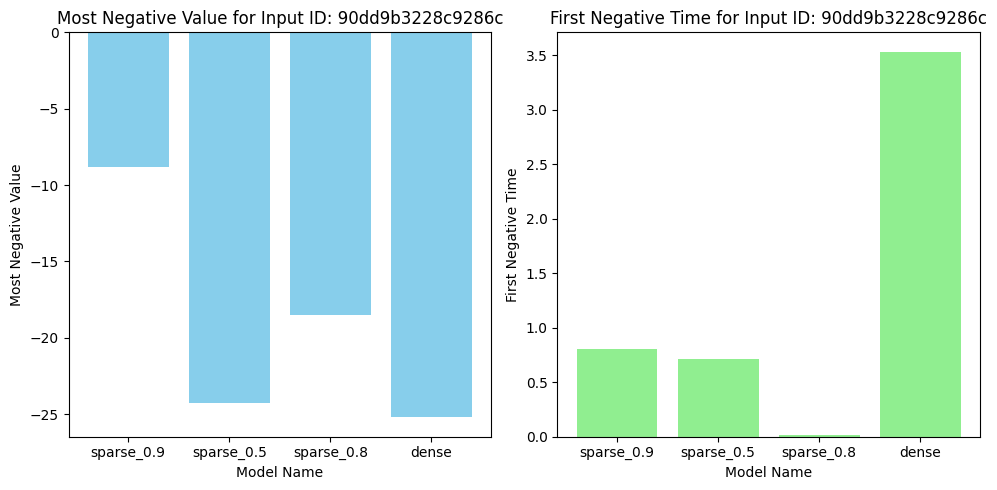

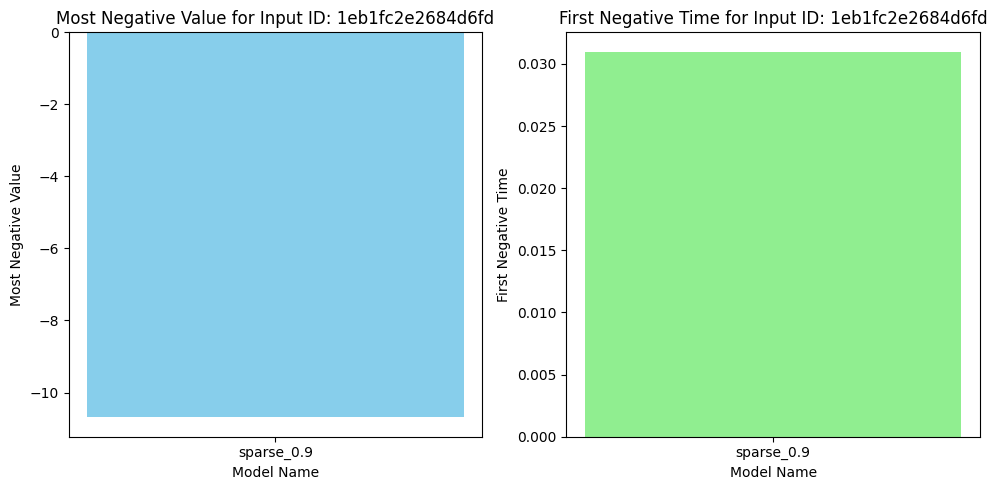

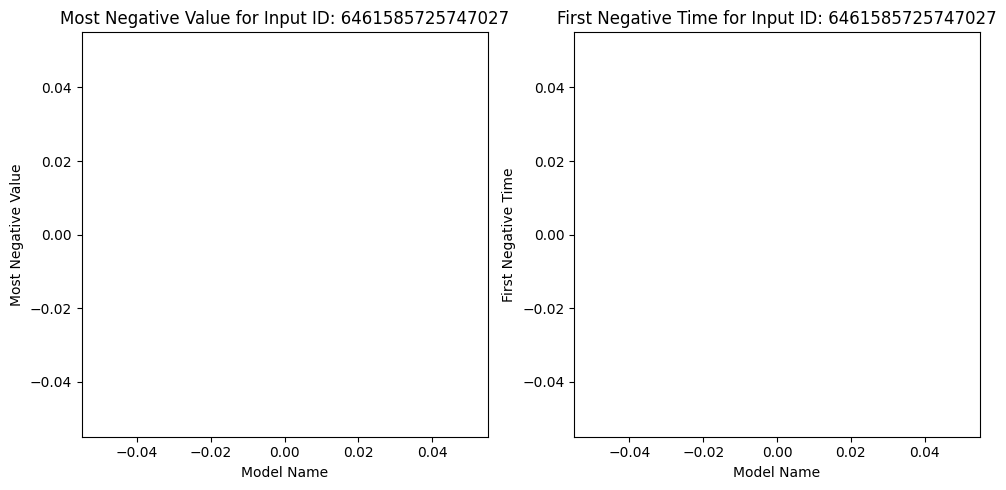

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

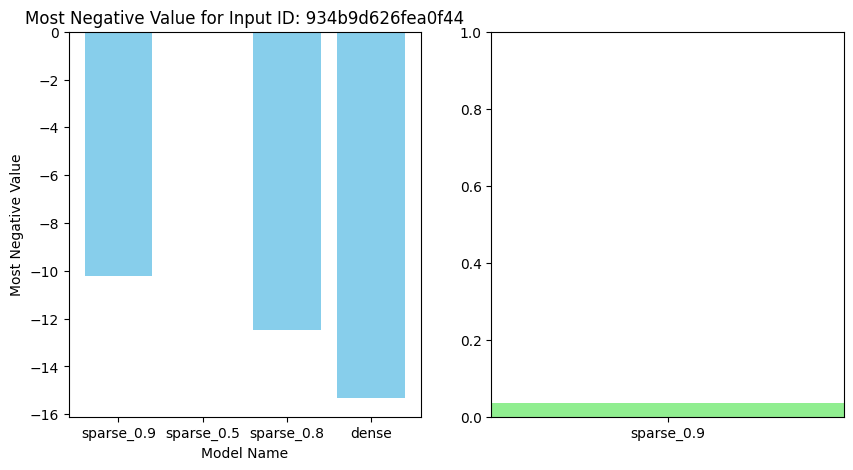

In [18]:
# Extract model data
data_dict = extract_model_data()

# Visualize the data
print(data_dict)
visualize_model_data(data_dict)
